In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2


from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Soilit/picture_dataset/soil_training'
valid_path = '/content/drive/MyDrive/Soilit/picture_dataset/soil_test'

In [ ]:
mobilenet = MobileNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# don't train existing weights
for layer in mobilenet.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Soilit/picture_dataset/soil_training')

# our layers - you can add more if you want
x = Flatten()(mobilenet.output)

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilenet.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Soilit/picture_dataset/soil_training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1113 images belonging to 11 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Soilit/picture_dataset/soil_test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1113 images belonging to 11 classes.


In [ ]:
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(training_set.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    training_set,
    epochs=20,
    validation_data=test_set
)

Epoch 1/20
35/35 [==============================] - 54s 1s/step - loss: 0.4939 - accuracy: 0.8338 - val_loss: 0.4218 - val_accuracy: 0.8473
Epoch 2/20
35/35 [==============================] - 46s 1s/step - loss: 0.4349 - accuracy: 0.8553 - val_loss: 0.4209 - val_accuracy: 0.8464
Epoch 3/20
35/35 [==============================] - 46s 1s/step - loss: 0.4251 - accuracy: 0.8509 - val_loss: 0.3957 - val_accuracy: 0.8634
Epoch 4/20
35/35 [==============================] - 47s 1s/step - loss: 0.3960 - accuracy: 0.8634 - val_loss: 0.4371 - val_accuracy: 0.8437
Epoch 5/20
35/35 [==============================] - 46s 1s/step - loss: 0.3728 - accuracy: 0.8679 - val_loss: 0.3672 - val_accuracy: 0.8724
Epoch 6/20
35/35 [==============================] - 49s 1s/step - loss: 0.3710 - accuracy: 0.8643 - val_loss: 0.3992 - val_accuracy: 0.8562
Epoch 7/20
35/35 [==============================] - 46s 1s/step - loss: 0.3720 - accuracy: 0.8571 - val_loss: 0.3655 - val_accuracy: 0.8715
Epoch 8/20
35/35 [==

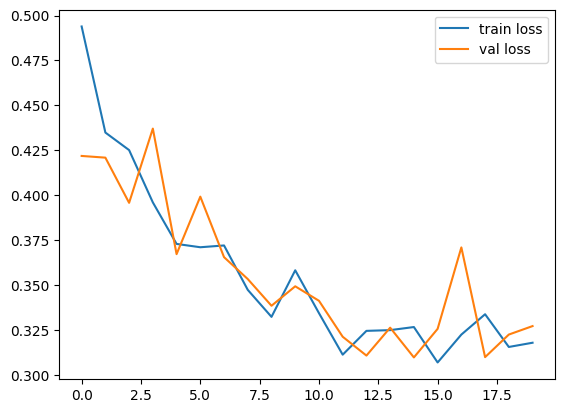

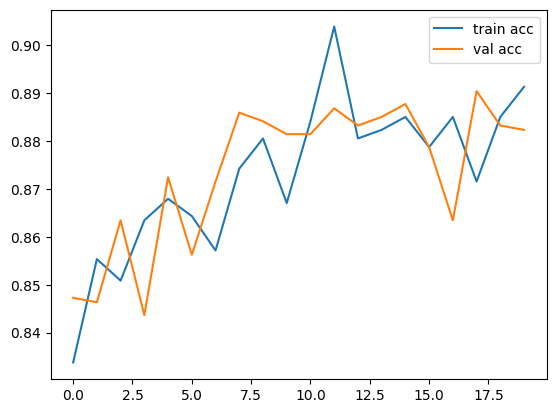

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import save_model

# Save the model as an h5 file
save_model(model, 'model_mobilenetv2.h5')

In [ ]:
y_pred = model.predict(test_set)

35/35 [==============================] - 54s 490ms/step


In [ ]:
y_pred

array([[2.4877317e-04, 1.8554300e-06, 9.9880219e-01, ..., 5.0569928e-05,
        8.5218757e-04, 4.1049705e-07],
       [8.0489749e-01, 4.4247307e-05, 4.7158073e-06, ..., 3.2586567e-02,
        2.2439206e-02, 4.6669645e-03],
       [9.8870987e-01, 2.8396877e-03, 7.1034819e-04, ..., 3.6246729e-05,
        1.1377642e-03, 6.9268244e-05],
       ...,
       [1.9444785e-08, 9.9972993e-01, 1.1461746e-05, ..., 2.6481439e-05,
        2.6635511e-05, 4.3558178e-08],
       [2.4557149e-02, 8.8498992e-01, 8.2285292e-03, ..., 2.7564749e-02,
        8.8311778e-03, 1.3506231e-03],
       [5.1578501e-04, 8.6848647e-04, 5.8011096e-07, ..., 1.5847886e-03,
        2.1626875e-04, 1.6805312e-05]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([2, 0, 0, ..., 1, 1, 3])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

model = load_model('model_mobilenetv2.h5')
img_data = image.load_img('/content/drive/MyDrive/Image_23 (1).jpg', target_size=(224, 224))
img_array = image.img_to_array(img_data)
preprocessed_img = preprocess_input(img_array)
preprocessed_img = np.expand_dims(preprocessed_img, axis=0)

# Make predictions using the MobileNetV2 model
predictions = model.predict(preprocessed_img)

1/1 [==============================] - 1s 1s/step


In [ ]:
import numpy as np

# Assuming you have already loaded and preprocessed the image and made predictions
predictions = model.predict(preprocessed_img)
predicted_class_index = np.argmax(predictions)
class_labels = ['Tanah Aluvial', 'Tanah Gambut ', 'Tanah Humus', 'Tanah Laterit', 'Tanah Litosol', 'Tanah Kapur', 'Tanah Liat', 'Tanah Organosol', 'Tanah Pasir', 'Tanah Regosol', 'Tanah Vulkanik']  # Replace with your own class labels

predicted_class_label = class_labels[predicted_class_index]
predicted_probability = predictions[0][predicted_class_index]

print("Predicted class:", predicted_class_label)
print("Probability:", predicted_probability)

1/1 [==============================] - 0s 33ms/step
Predicted class: Tanah Gambut 
Probability: 0.88303685


In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Convert the model to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

In [ ]:
# Assuming you have already trained your model and have access to the class labels

# Define your class labels
class_labels = ['Tanah Aluvial', 'Tanah Gambut ', 'Tanah Humus', 'Tanah Laterit', 'Tanah Litosol', 'Tanah Kapur', 'Tanah Liat', 'Tanah Organosol', 'Tanah Pasir', 'Tanah Regosol', 'Tanah Vulkanik']  # Replace with your own class labels

# Save the class labels to the labels.txt file
with open('labels.txt', 'w') as f:
    for label in class_labels:
        f.write(label + '\n')